## Linear Regression
# Assignment No 6
### 20UCS304

## 1. Using sklearn

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
%matplotlib inline 

- Read data from CSV

In [31]:
data=pd.read_csv(r'data/height_weight.csv')
X=data[['height']]
y=data[['weight']]
data.describe()

,height,weight
count,5.000000,5.00000
mean,40.000000,39.00000
std,3.162278,7.81025
min,36.000000,30.00000
25%,38.000000,34.00000
50%,40.000000,38.00000
75%,42.000000,43.00000
max,44.000000,50.00000


- Plot the given data

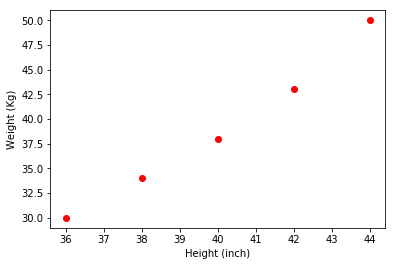

In [32]:
plt.xlabel("Height (inch)")
plt.ylabel("Weight (Kg)")
plt.scatter(X,y,color='r')

- Create object of LinearRegression Model

In [33]:
model=LinearRegression()

- Fit the data to model

In [34]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- Know you can get the coeficient and intercept

In [101]:
print("Coeficient :",model.coef_)
print("Intercepte :",model.intercept_)

Coeficient : [[2.45]]
Intercepte : [-59.]


- Predict weight for height 43

In [37]:
print("Weight for height 43: ",model.predict([[43]])[0][0])

Weight for height 43:  46.35000000000001


In [38]:
predicted=model.predict(X)

- Difference between actual and predicted values.

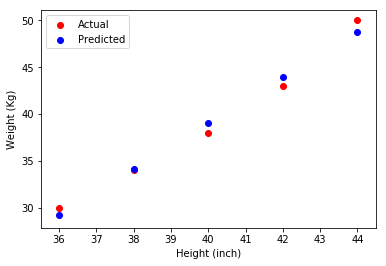

In [40]:
plt.xlabel("Height (inch)")
plt.ylabel("Weight (Kg)")
plt.scatter(X,y,color='r',label="Actual")
plt.scatter(X,predicted,color='b',label="Predicted")
plt.legend()
plt.show()

## 2. Create a model without using library

- forumula for correlation 

![Formula](https://www.gstatic.com/education/formulas2/355397047/en/correlation_coefficient_formula.svg "forumula for correlation")


r	=	correlation coefficient

xi	=	values of the x-variable in a sample

x_bar	=	mean of the values of the x-variable

yi	=	values of the y-variable in a sample

y_bar	=	mean of the values of the y-variable

- Read data from csv

In [79]:
data=pd.read_csv(r'data/height_weight.csv')
X=data[['height']].values
y=data[['weight']].values
data.describe()

,height,weight
count,5.000000,5.00000
mean,40.000000,39.00000
std,3.162278,7.81025
min,36.000000,30.00000
25%,38.000000,34.00000
50%,40.000000,38.00000
75%,42.000000,43.00000
max,44.000000,50.00000


- Calculate x and y mean

In [80]:
x_bar=(sum(X)/len(X))[0]
y_bar=(sum(y)/len(y))[0]

- Calculate ρ= ∑(xᵢ-x_bar)(yᵢ-y_bar)

In [97]:
p=0
for i in range(X.size):
    p+=(X[i]-x_bar)*(y[i]-y_bar)
p=p[0]
p

98.0

- Calculate σx and σy

    σx=√∑(xᵢ-x_bar)²

    σy=√∑(yᵢ-y_bar)²

In [103]:
sx2=0
sy2=0
for i in range(X.size):
    sx2+=(X[i]-x_bar)**2
    sy2+=(y[i]-y_bar)**2
sx=(sx2**.5)[0]
sy=(sy2**.5)[0]
sx,sy

(6.324555320336759, 15.620499351813308)

- Calculate σx * σy

In [104]:
sxsy=sx*sy
sxsy

98.79271228182775

In [100]:
corXY=p/sxsy
corXY

0.9919760044691721

- lets calculate w1 and w0

    w1=ρ/σx²

    w0=y_bar-(w1*x_bar)

In [106]:
w1=(p/sx2)[0]
w1

2.45

In [108]:
w0=y_bar-(w1*x_bar)
w0

-59.0

- lets define a method predict to predict values using model

ŷ=h(x)=w0+(w1*x)

In [116]:
def predict(x):
    return w0+(w1*x)

- lets predict weight for 43 height

In [117]:
predict(43)

46.35000000000001

In [118]:
predicted=[predict(x) for x in X]

- Difference between actual and predicted values.

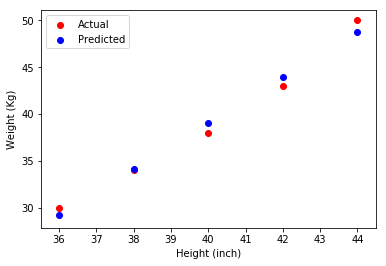

In [119]:
plt.xlabel("Height (inch)")
plt.ylabel("Weight (Kg)")
plt.scatter(X,y,color='r',label="Actual")
plt.scatter(X,predicted,color='b',label="Predicted")
plt.legend()
plt.show()